In [33]:
# Start writing code here...
import pandas as pd
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline


In [34]:
df = pd.read_csv("ml_dataset.csv")
df.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,Agrement,synthese_eval_encode,month,day,activite_category,departement
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,92240,MALAKOFF,15914760,2021-03-03 00:00:00+00:00,0,1.0,3,3,Alimentation générale,92
1,KERMOYAN (RESTAU RAPIDE),30112032500024,69500,BRON,16252422,2021-11-26 00:00:00+00:00,0,0.0,11,11,Restaurant,69
2,NATURALIA (NATURALIA FRANCE),30247464801894,92800,PUTEAUX,15903092,2021-02-22 00:00:00+00:00,0,0.0,2,2,Alimentation générale,92
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,78460,CHEVREUSE,15901554,2021-02-19 00:00:00+00:00,0,1.0,2,2,_,78
4,INTERMARCHE (VIRODIS),30668909200022,94290,VILLENEUVE LE ROI,15968279,2021-04-14 00:00:00+00:00,0,1.0,4,4,Alimentation générale,94


In [35]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder(categories=[["Très satisfaisant","Satisfaisant","A améliorer","A corriger de manière urgente"]])

In [36]:
for i in df:
    try:
        df[i] = df[i].astype(int)
    except:
        print(i)

APP_Libelle_etablissement
SIRET
Libelle_commune
Numero_inspection
Date_inspection
activite_category


In [37]:
data = df.copy()
data = data.drop(['SIRET','Libelle_commune','day' ,'Numero_inspection', 'Date_inspection',"APP_Libelle_etablissement"], axis=1)
# 
data.head()

,Code_postal,Agrement,synthese_eval_encode,month,activite_category,departement
0,92240,0,1,3,Alimentation générale,92
1,69500,0,0,11,Restaurant,69
2,92800,0,0,2,Alimentation générale,92
3,78460,0,1,2,_,78
4,94290,0,1,4,Alimentation générale,94


In [38]:


# Define our Independent(predictor) and Dependent(response) variables.
X = data.drop(['synthese_eval_encode'],axis=1)
y = data['synthese_eval_encode']
print(X.shape)

# Split our dataset into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.20,stratify=y)
df["month"].value_counts()

(36987, 5)


9     3832
10    3829
6     3784
3     3772
11    3565
4     3004
7     2965
5     2827
2     2825
12    2790
8     2753
1     1041
Name: month, dtype: int64

In [39]:
#vérification des dimensions
y_train.shape , y_test.shape

((29589,), (7398,))

In [40]:
#vérification des distributions en apprentissage
y_train.value_counts(normalize=True)

1    0.529487
0    0.419041
2    0.048295
3    0.003177
Name: synthese_eval_encode, dtype: float64

In [41]:
#vérification des distributions en test
y_test.value_counts(normalize=True)

1    0.529467
0    0.419032
2    0.048256
3    0.003244
Name: synthese_eval_encode, dtype: float64

In [42]:


model1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'),tree.DecisionTreeClassifier(min_samples_split=150,max_depth=15,max_leaf_nodes=15)) 
model1[0].fit(X)
model1[1].fit(model1[0].transform(X_test),y_test)
# classifier=tree.DecisionTreeClassifier(min_samples_split=20,max_depth=15,max_leaf_nodes=15)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=15, min_samples_split=150)

In [43]:
# classifier.fit(X_train,y_train)

In [44]:
# X_test=one_hot.transform(X_test)
y_pred=model1.predict(X_test)

comparison= y_pred=y_test
print(comparison.all())

y_pred.value_counts()

False


1    3917
0    3100
2     357
3      24
Name: synthese_eval_encode, dtype: int64

In [45]:
model1

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, max_leaf_nodes=15,
                                        min_samples_split=150))])

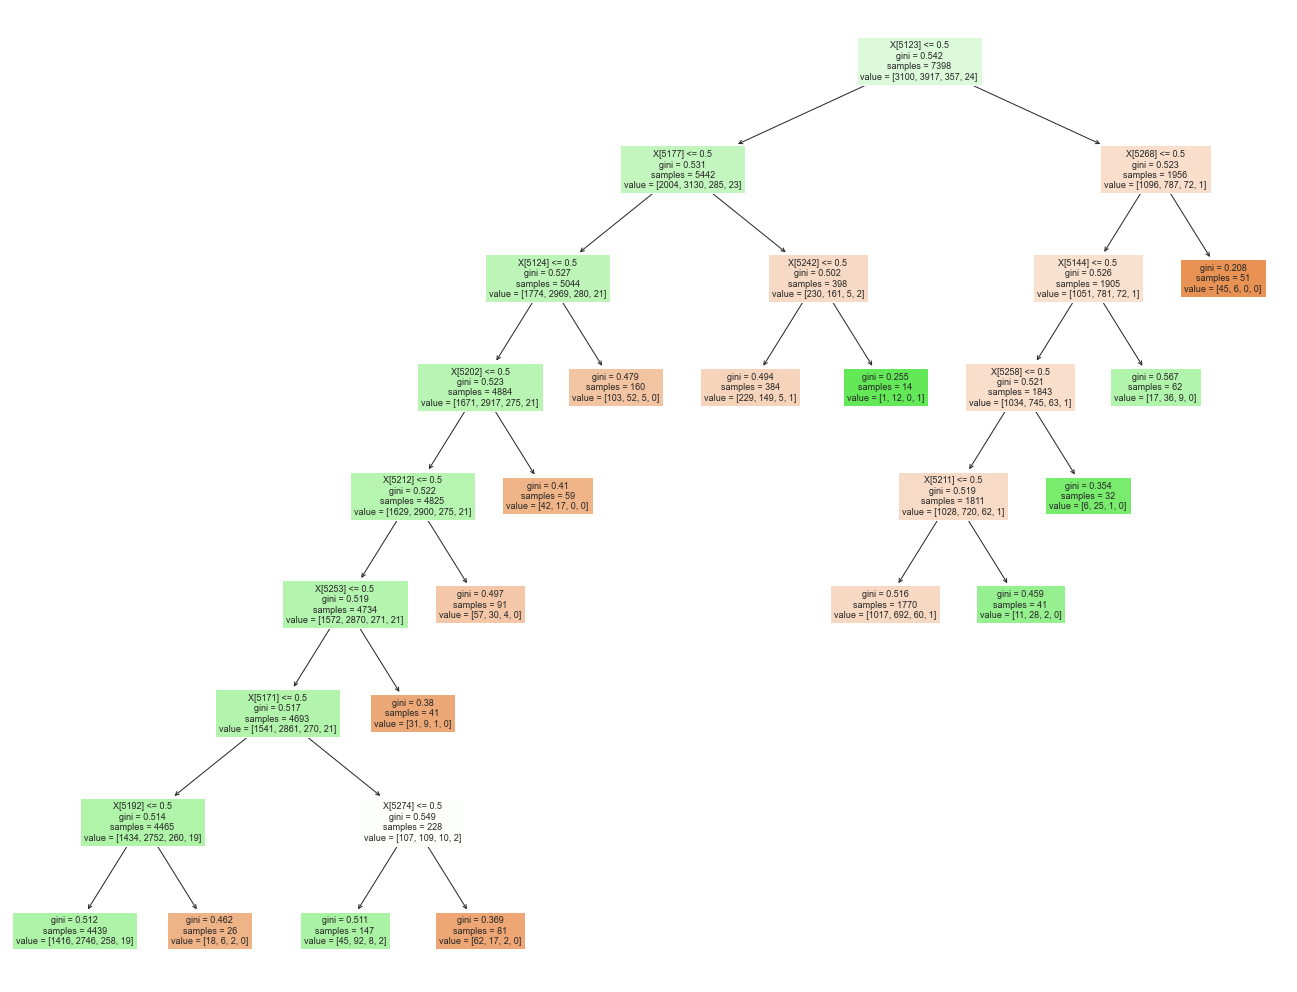

In [46]:

plt.figure(figsize=(23,18))

tree.plot_tree(model1[1],fontsize=9,filled=True)

plt.show()

In [47]:
from sklearn.metrics import classification_report
y_pred=model1.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56      3100
           1       0.62      0.75      0.68      3917
           2       0.00      0.00      0.00       357
           3       0.00      0.00      0.00        24

    accuracy                           0.61      7398
   macro avg       0.31      0.32      0.31      7398
weighted avg       0.58      0.61      0.59      7398



In [48]:
from sklearn.metrics import confusion_matrix

classifier_matrix=confusion_matrix(y_test, y_pred)
classifier_matrix

array([[1604, 1496,    0,    0],
       [ 978, 2939,    0,    0],
       [  79,  278,    0,    0],
       [   2,   22,    0,    0]])

<AxesSubplot:>

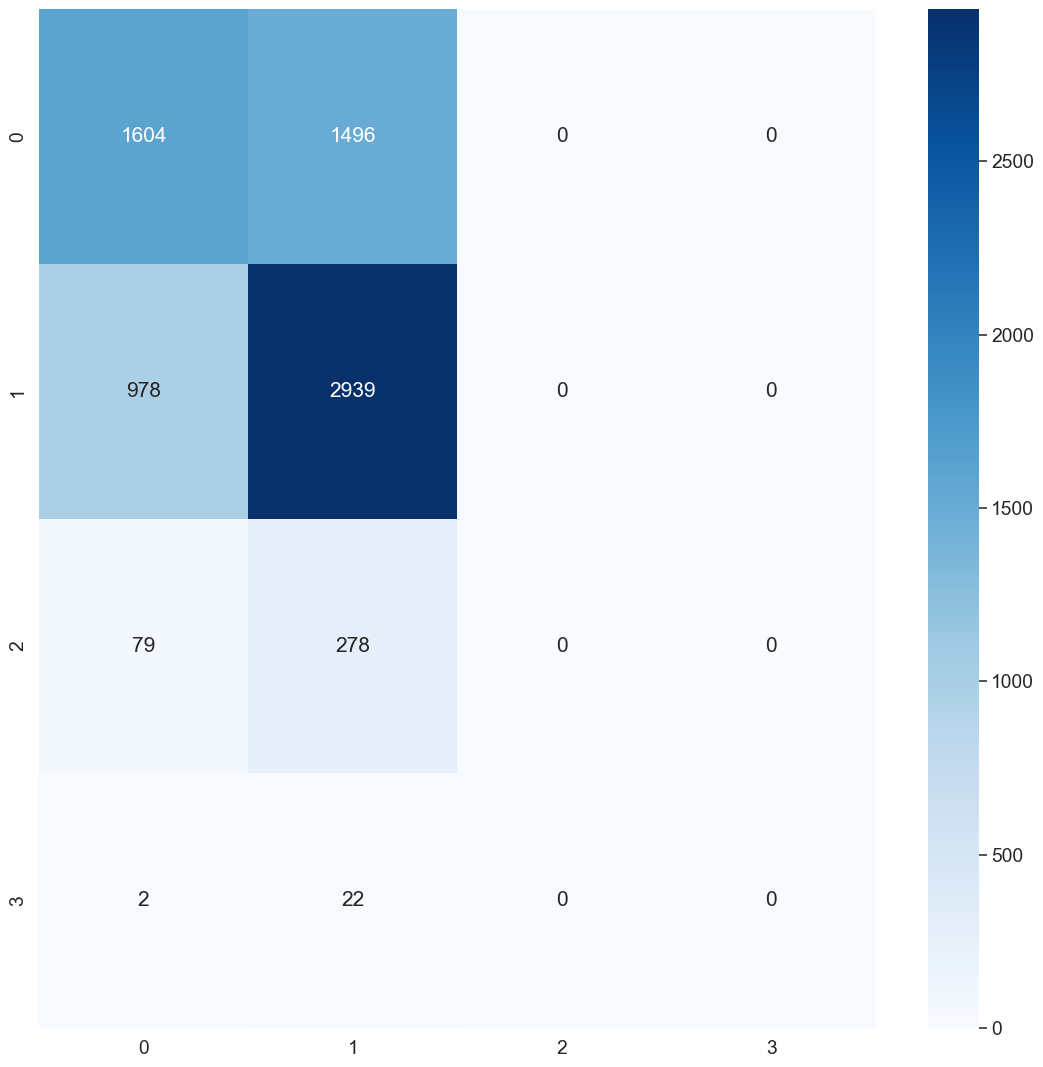

In [49]:
import seaborn as sns
plt.figure(figsize=(15,15),dpi=90)
sns.set(font_scale=1.4)
sns.heatmap(classifier_matrix, annot=True,fmt='g', cmap='Blues')

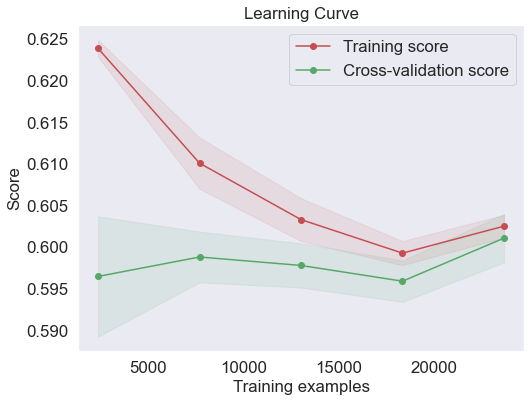

In [50]:

import scikitplot as skplt
skplt.estimators.plot_learning_curve(model1, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [51]:
# from sklearn.preprocessing import Normalizer

# transform_X=Normalizer().fit(X)
# X_norm=transform_X.transform(X)



# X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y,random_state=42,test_size=0.20,stratify=y)



In [52]:
# norm_classifier=tree.DecisionTreeClassifier(min_samples_split=20,max_depth=5,max_leaf_nodes=15)
# norm_classifier.fit(X_norm_train,y_train)

In [53]:

# plt.figure(figsize=(23,18))

# tree.plot_tree(norm_classifier,fontsize=15,filled=True,feature_names=list(X.columns))

# plt.show()

In [54]:
# y_norm_pred=norm_classifier.predict(X_norm_test)
# print(classification_report(y_test, y_norm_pred,zero_division=0))

In [55]:
# norm_classifier_matrix=confusion_matrix(y_test, y_norm_pred)
# plt.figure(figsize=(15,15),dpi=90)
# sns.set(font_scale=1.4)
# sns.heatmap(norm_classifier_matrix, annot=True,fmt='g', cmap='Blues')

In [56]:
from sklearn.model_selection import KFold
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

In [57]:
range_param=[i for i in range(1,12)]
params = {'max_depth':[i for i in range(10,30,10)],'max_leaf_nodes':[i for i in range(10,100,20)]}
params

{'max_depth': [10, 20], 'max_leaf_nodes': [10, 30, 50, 70, 90]}

In [83]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(model1[1], params, scoring='recall')

In [84]:
grid_cv.fit(model1[0].transform(X_train),y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1901, in recall_score
    _, r, _, _ = precision_reca

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=15, max_leaf_nodes=15,
                                              min_samples_split=150),
             param_grid={'max_depth': [10, 20],
                         'max_leaf_nodes': [10, 30, 50, 70, 90]},
             scoring='recall')

In [85]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_split=150)

In [86]:
best_params = grid_cv.best_params_
best_params

{'max_depth': 10, 'max_leaf_nodes': 10}

In [87]:
ynew_pred=best_tree.predict(model1[0].transform(X_test))

In [89]:
print(classification_report(y_test, ynew_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      3100
           1       0.61      0.72      0.66      3917
           2       0.50      0.03      0.05       357
           3       0.00      0.00      0.00        24

    accuracy                           0.60      7398
   macro avg       0.42      0.32      0.32      7398
weighted avg       0.59      0.60      0.58      7398



<AxesSubplot:>

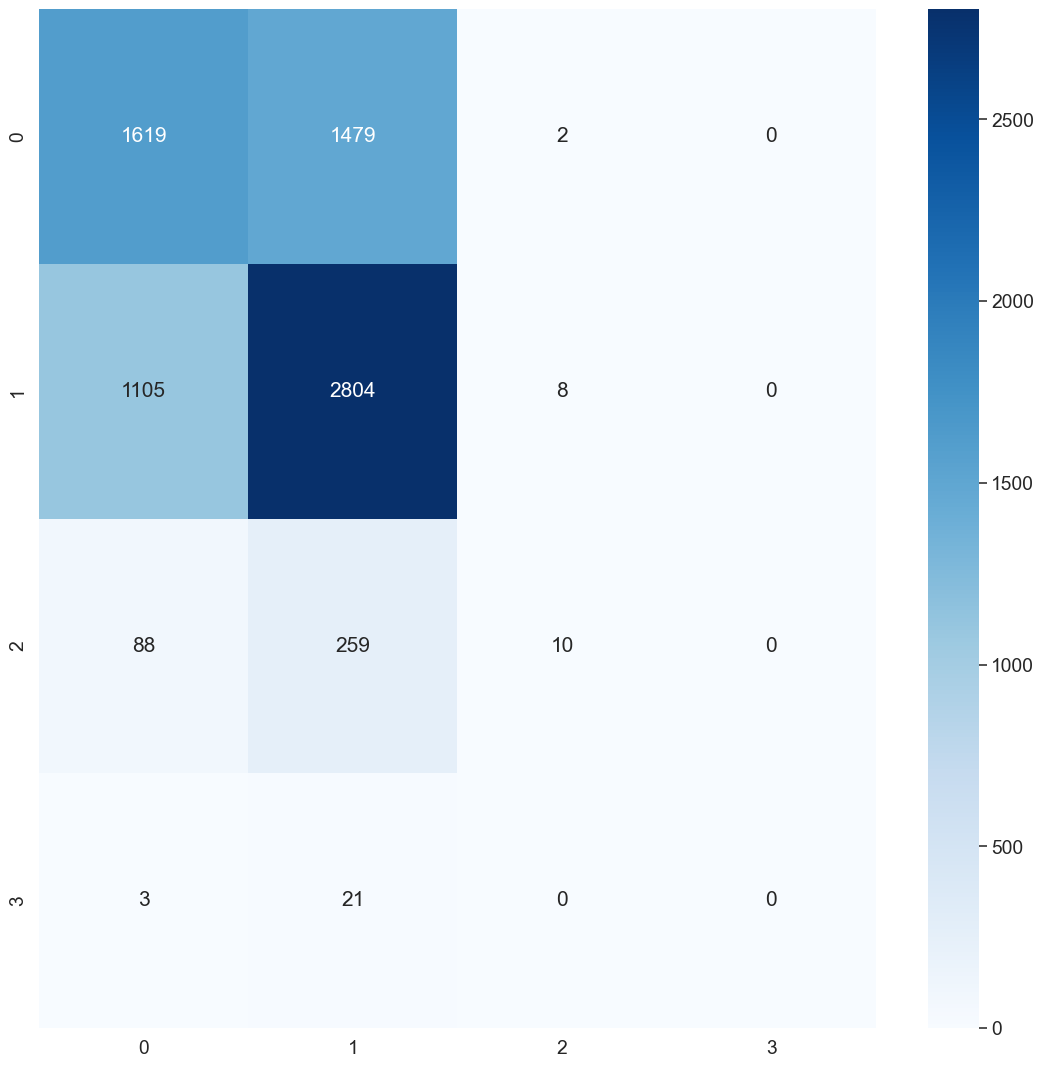

In [90]:
best_tree_matrix=confusion_matrix(y_test, ynew_pred)
plt.figure(figsize=(15,15),dpi=90)
sns.set(font_scale=1.4)
sns.heatmap(best_tree_matrix, annot=True,fmt='g', cmap='Blues')

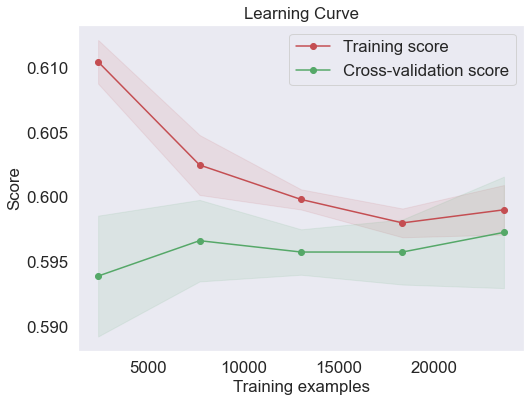

In [91]:
skplt.estimators.plot_learning_curve(best_tree, model1[0].transform(X_train), y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [67]:
rf.fit(model1[0].transform(X_train), y_train)

RandomForestClassifier()

In [68]:
y_rf_pred=rf.predict(model1[0].transform(X_test))
print(classification_report(y_test, y_rf_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3100
           1       0.66      0.74      0.70      3917
           2       0.41      0.12      0.19       357
           3       0.00      0.00      0.00        24

    accuracy                           0.65      7398
   macro avg       0.43      0.37      0.38      7398
weighted avg       0.64      0.65      0.64      7398



<AxesSubplot:>

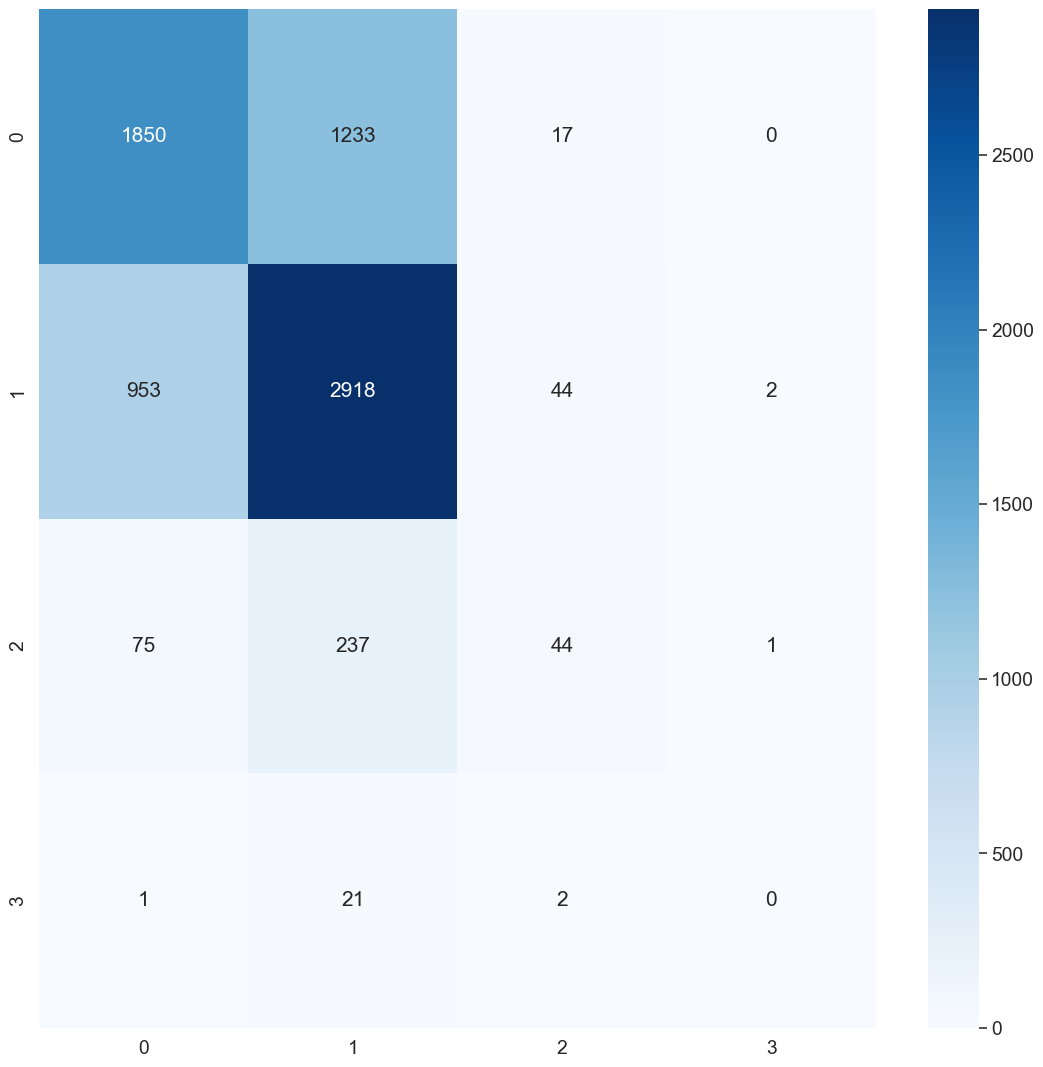

In [69]:
rf_matrix=confusion_matrix(y_test,rf.predict(model1[0].transform(X_test)))
plt.figure(figsize=(15,15),dpi=90)
sns.set(font_scale=1.4)
sns.heatmap(rf_matrix, annot=True,fmt='g', cmap='Blues')

In [70]:
ransom_forest=make_pipeline(OneHotEncoder(handle_unknown='ignore'),RandomForestClassifier())
ransom_forest[0].fit(X)
ransom_forest[1].fit(model1[0].transform(X_train),y_train)


RandomForestClassifier()

In [71]:
y_rans_pred=ransom_forest.predict(X_test)

In [72]:
print(classification_report(y_test, y_rans_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3100
           1       0.66      0.74      0.70      3917
           2       0.42      0.13      0.19       357
           3       0.00      0.00      0.00        24

    accuracy                           0.65      7398
   macro avg       0.43      0.37      0.38      7398
weighted avg       0.64      0.65      0.64      7398



['Code_postal', 'Agrement', 'month', 'activite_category', 'departement']

In [73]:
from joblib import dump

# dump the pipeline model
dump(ransom_forest, filename="classification.joblib")

['classification.joblib']

In [74]:
grid_rf=GridSearchCV(ransom_forest[1], params, scoring='recall')
grid_rf.fit(ransom_forest[0].transform(X_train),y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20],
                         'max_leaf_nodes': [10, 30, 50, 70, 90]},
             scoring='accuracy')

In [75]:
from sklearn.metrics import RocCurveDisplay

In [76]:
best_rf = grid_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=20, max_leaf_nodes=70)

In [77]:
best_params_rf = grid_rf.best_params_
best_params_rf

{'max_depth': 20, 'max_leaf_nodes': 70}

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
wsh=model1[0].get_feature_names_out()
# feature_imp = pd.Series(rf.feature_importances_,index=wsh).sort_values(ascending=False)

# # Creating a bar plot
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()
# wsh


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a1379aa-ea9c-402c-95ca-194460431a68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>